# Assignment 10, Part 2: Data Wrangling Practice
Use this notebook to follow along with the tasks in the `AO8-Data_Wrangling.ipynb` notebook.

## Instructions
For each task, use the cell below to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup


Import the following packages:
+ `pandas` as `pd`
+ `numpy` as `np`
+ `matplotlib.pyplot` as `plt`
+ `Seaborn` as `sns`

Activate the `%matplotlib inline` magic.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 5a: Bring it all Together

You have been provided with two data files:
- `paired_genes.txt`: contains log2 transformed gene expression-levels of two genes from *Oryza sativa* (rice). The data contains 463 data points corresponding to samples of extracted RNA.
- `project_samples.txt`: contains the list of 463 samples and the experimental conditions underwhich the data was collected.  

The `project_samples.txt` file contains 6 variables:  
1. Sample ID
2. Treatment: CONTROL, HEAT, DROUGHT 
3. Time: a time series in minutes 
4. Genotype: one of 4 varities of rice
5. Subspecies: either Indica or  Japonica
6. Subtreatment: CONTORL, HEAT, RECOV_HEAT, DROUGHT or RECOV_DROUGHT

This data was obtained from [NCBI SRA Project PRJNA301554](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA301554/)

Import both of these files and generate a scatterplot comparing the gene expression of the two genes. Color the points in the dataframe by the Subtreatment.  Remember to
1. Explore the data
2. Clean the data (if needed)
3. Reshape the data by combining both into a single data frame.
4. Plot the scatterplot using Seaborn and the new single data frame.

In [3]:
abalone = pd.read_csv('data/abalone.data', header = None)
abalone.columns = ['Sample_ID','Sex', 'Length', 'Diameter', 'Height', 
          'Whole_weight', 'Shucked_weight', 'Viscera_weight', 
          'Shell_weight', 'Rings']
abalone.head()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1000,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1001,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1002,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1003,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1004,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.dtypes

Sample_ID           int64
Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [5]:
abalone.shape

(4186, 10)

In [6]:
abalone.describe()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4186.000000,4186.000000,4184.000000,4185.000000,4186.000000,4185.000000,4186.000000,4185.000000,4186.000000,4186.000000
mean,3086.700669,0.955805,0.523635,0.407621,0.139406,0.827486,0.358964,0.180390,0.238535,9.930244
std,1206.816977,0.828239,0.120323,0.099446,0.041890,0.490774,0.222266,0.109723,0.139352,3.222740
min,1000.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,2039.250000,0.000000,0.450000,0.350000,0.115000,0.440500,0.185125,0.092500,0.130000,8.000000
50%,3085.500000,1.000000,0.545000,0.425000,0.140000,0.798000,0.335500,0.170500,0.233000,9.000000
75%,4131.750000,2.000000,0.615000,0.480000,0.165000,1.153000,0.501500,0.252500,0.328500,11.000000
max,5178.000000,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone.groupby(by=['Sex']).size()

Sex
0    1532
1    1307
2    1347
dtype: int64

In [8]:
abalone.isna().head()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [9]:
abalone.isna().sum()

Sample_ID         0
Sex               0
Length            2
Diameter          1
Height            0
Whole_weight      1
Shucked_weight    0
Viscera_weight    1
Shell_weight      0
Rings             0
dtype: int64

In [11]:
abalone.nunique()

Sample_ID         4179
Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

In [12]:
abalone[abalone.duplicated(subset='Sample_ID', keep= False)]

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
711,1711,0,0.375,0.300,0.100,0.2465,0.1040,0.0475,0.0830,11
712,1712,2,0.280,0.205,0.055,0.1135,0.0450,0.0275,0.0335,7
713,1713,0,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695,8
714,1714,0,0.350,0.255,0.080,0.1915,0.0800,0.0385,0.0630,9
715,1715,2,0.275,0.200,0.065,0.1035,0.0475,0.0205,0.0300,7
716,1716,2,0.290,0.205,0.070,0.0975,0.0360,0.0190,0.0350,8
717,1717,2,0.250,0.190,0.060,0.0765,0.0360,0.0115,0.0245,6
4179,1711,0,0.375,0.300,0.100,0.2465,0.1040,0.0475,0.0830,11
4180,1712,2,0.280,0.205,0.055,0.1135,0.0450,0.0275,0.0335,7
4181,1713,0,0.355,0.265,0.085,0.2010,0.0690,0.0530,0.0695,8


In [13]:
# First convert the column from an integer to a string.
sex = abalone['Sex'].astype(str)

# Second convert 0 to Male, 1 to Female, and 2 to Infant.
sex = sex.replace('0', 'Male')
sex = sex.replace('1', 'Female')
sex = sex.replace('2', 'Infant')

# Now replace the 'Sex' column of the dataframe with the new Series.
abalone['Sex'] = sex
abalone.head()

,Sample_ID,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1000,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1001,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1002,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1003,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1004,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
# Convert Sample_ID to a string
abalone['Sample_ID'] = abalone['Sample_ID'].astype(str)

# Let's check out the datatypes to make sure they match our expectations:
abalone.dtypes

Sample_ID          object
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [15]:
abalone = abalone.dropna(axis=0)
abalone.shape

(4184, 10)

In [16]:
abalone = abalone.drop_duplicates(['Sample_ID'], keep='first')
abalone.shape

(4177, 10)

In [18]:
dfg = pd.read_csv('data/paired_genes.txt', sep='\t')
dfg.head(10)

,Gene,SRR2931040,SRR2931041,SRR2931042,SRR2931043,SRR2931044,SRR2931045,SRR2931046,SRR2931047,SRR2931048,...,SRR2931504,SRR2931505,SRR2931506,SRR2931507,SRR2931509,SRR2931510,SRR2931511,SRR2931512,SRR2931513,SRR2931514
0,LOC_Os04g28420.1,4.268040,4.116958,4.012293,2.288004,3.465565,4.226350,2.000699,3.832970,3.271376,...,2.566332,1.055844,2.405943,0.933891,-0.717344,1.680053,0.460852,2.754201,3.089294,2.502104
1,LOC_Os02g28980.1,5.141542,4.879507,5.029932,4.331433,4.281086,5.036735,4.171653,4.995372,4.789523,...,4.431035,3.699905,3.680951,3.692540,3.468674,3.799060,3.657446,3.437537,4.478832,4.366382


In [21]:
dfg.shape

(2, 463)

In [23]:
dfg1 = pd.melt(dfg, id_vars=['Gene'], var_name='Sample', value_name='Expression Level' )
dfg1.head()

,Gene,Sample,Expression Level
0,LOC_Os04g28420.1,SRR2931040,4.268040
1,LOC_Os02g28980.1,SRR2931040,5.141542
2,LOC_Os04g28420.1,SRR2931041,4.116958
3,LOC_Os02g28980.1,SRR2931041,4.879507
4,LOC_Os04g28420.1,SRR2931042,4.012293


In [24]:
dfg1.shape

(924, 3)

In [25]:
dfg2 = dfg1.pivot_table(index=['Sample'], columns = 'Gene', values = 'Expression Level')
dfg2.reset_index(drop=False, inplace=True)
dfg2.head()

Gene,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1
0,SRR2931040,5.141542,4.268040
1,SRR2931041,4.879507,4.116958
2,SRR2931042,5.029932,4.012293
3,SRR2931043,4.331433,2.288004
4,SRR2931044,4.281086,3.465565


In [26]:
dfg2.shape

(462, 3)

In [27]:
dfg2.groupby('Sample')
dfg2.head()

Gene,Sample,LOC_Os02g28980.1,LOC_Os04g28420.1
0,SRR2931040,5.141542,4.268040
1,SRR2931041,4.879507,4.116958
2,SRR2931042,5.029932,4.012293
3,SRR2931043,4.331433,2.288004
4,SRR2931044,4.281086,3.465565


In [28]:
dfg3=dfg2.drop(['Sample'], axis=1)

In [30]:
dftidy=pd.concat([dfg, dfg3], axis = 1)

In [34]:
dfs = pd.read_csv('data/project_samples.txt', sep='\t')
dfs.head(10)

,Sample,Treatment,Time,Genotype,Subspecies,Subtreatment
0,SRR2931040,CONTROL,15,AZ,Japonica,CONTROL
1,SRR2931041,CONTROL,15,AZ,Japonica,CONTROL
2,SRR2931042,CONTROL,30,AZ,Japonica,CONTROL
3,SRR2931043,CONTROL,30,AZ,Japonica,CONTROL
4,SRR2931044,CONTROL,45,AZ,Japonica,CONTROL
5,SRR2931045,CONTROL,45,AZ,Japonica,CONTROL
6,SRR2931046,CONTROL,60,AZ,Japonica,CONTROL
7,SRR2931047,CONTROL,60,AZ,Japonica,CONTROL
8,SRR2931048,CONTROL,75,AZ,Japonica,CONTROL
9,SRR2931049,CONTROL,75,AZ,Japonica,CONTROL


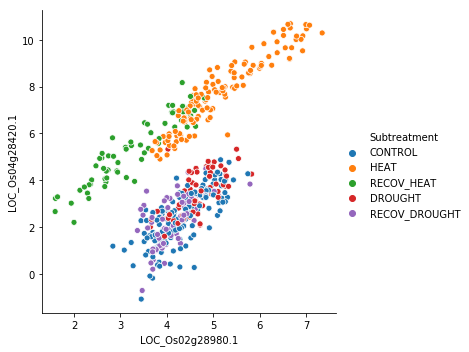

In [35]:
dfg2.shape
dfg2.groupby('Sample')
dfg2.head()
dfg3=dfg2.drop(['Sample'], axis=1)
dftidy=pd.concat([dfs, dfg3], axis = 1)
sns.relplot(x="LOC_Os02g28980.1", y="LOC_Os04g28420.1", hue="Subtreatment", data=dftidy)